In [ ]:
## Check out this library for working with CA: https://github.com/lantunes/cellpylib/tree/master/cellpylib

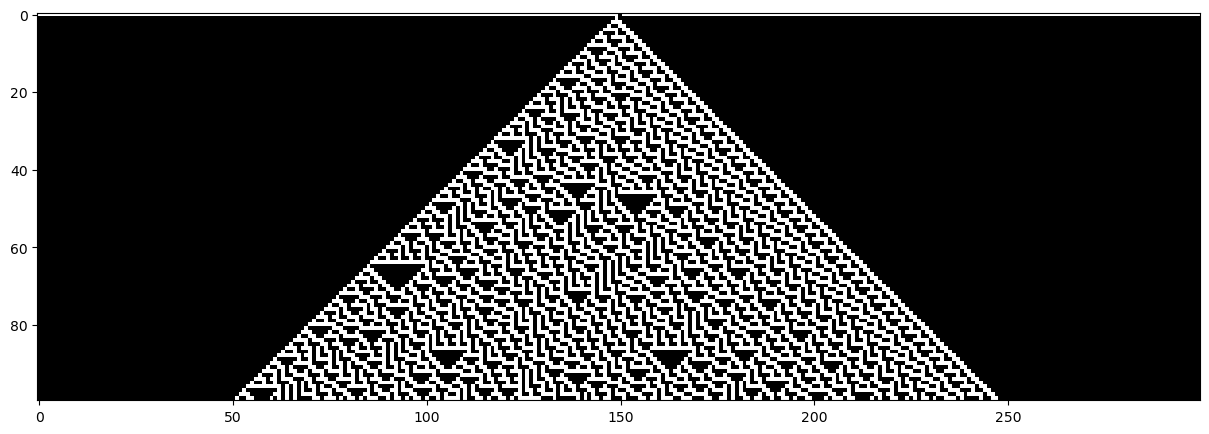

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def generate_rule30(width, height):
    # Initialize the cellular automaton with a single live cell in the middle of the first row
    automaton = np.zeros((height, width), dtype=int)
    automaton[0, width // 2] = 1
    
    # Define the Rule 30 transition rule
    rule30 = np.array([1, 0, 0, 0, 0, 1, 1, 1], dtype=int)

    for i in range(1, height):
        # Use numpy's efficient convolution to apply the rule to each neighborhood
        neighborhood = np.column_stack((np.roll(automaton[i - 1], -1), automaton[i - 1], np.roll(automaton[i - 1], 1)))
        automaton[i] = rule30[7 - np.sum(neighborhood * np.array([4, 2, 1]), axis=1)]

    return automaton

def plot_rule30(automaton):
    plt.figure(figsize=(15,15))
    plt.imshow(automaton, cmap="binary", interpolation="nearest")
    plt.show()

width = 300  # Width of the automaton (odd to have a centered initial cell)
height = 100  # Height of the automaton

rule30_automaton = generate_rule30(width, height)
plot_rule30(rule30_automaton)


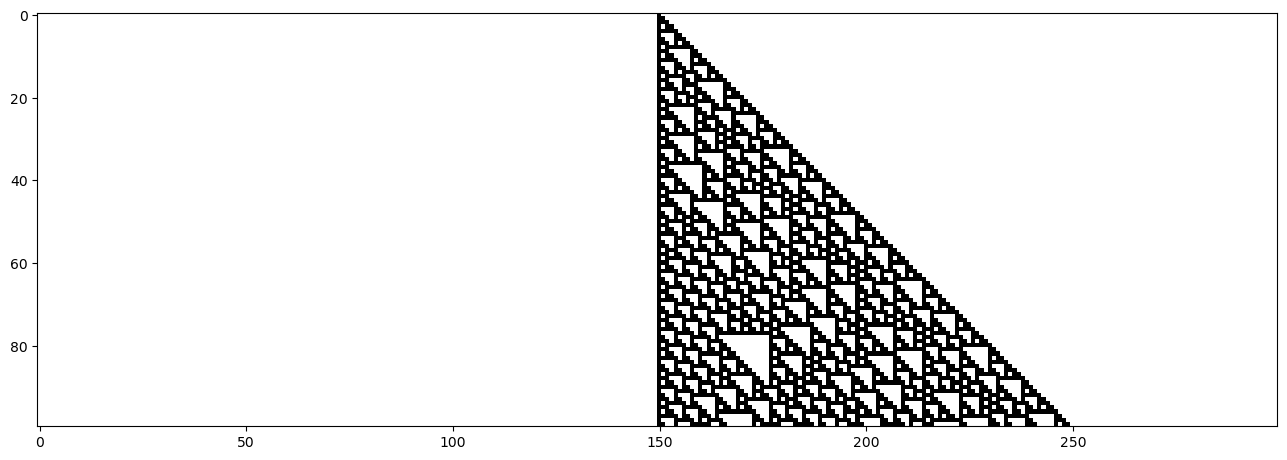

In [25]:
### RULE 110
import numpy as np
import matplotlib.pyplot as plt

def generate_rule110(width, height):
    # Initialize the cellular automaton with a single live cell in the middle of the first row
    automaton = np.zeros((height, width), dtype=int)
    automaton[0, width // 2] = 1
    
    # Define the Rule 110 transition rule
    rule110 = np.array([0, 1, 1, 0, 1, 1, 1, 0], dtype=int)

    for i in range(1, height):
        # Use numpy's efficient convolution to apply the rule to each neighborhood
        neighborhood = np.column_stack((np.roll(automaton[i - 1], -1), automaton[i - 1], np.roll(automaton[i - 1], 1)))
        automaton[i] = rule110[7 - np.sum(neighborhood * np.array([4, 2, 1]), axis=1)]

    return automaton

def plot_rule110(automaton, figsize=(16, 9)):
    plt.figure(figsize=figsize)
    plt.imshow(automaton, cmap="binary", interpolation="nearest")
    plt.show()


width = 300
height = 100

rule110_automaton = generate_rule110(width, height)
plot_rule110(rule110_automaton, figsize=(16, 9))


In [33]:
import numpy as np

# rng is random number generator
rng = np.random.RandomState(42) # seed with 42 to create stable result of random numbers.
# generate numbers
twenty_bits = rng.randint(0, 2, 20) # generate 20 random ints with the range 0 and 2 (excl). # 011000111...
# represents a block of cells with binary states. 0=black, white=1
print(twenty_bits)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0]


In [34]:
# For each bit, it knows it's left and right neighbor. There are 2^3 (8) possible states the bit and it's left and right neighbor can be in.

print('Possible states(neighborhoods) for a cell based on neighbors:\n')
for i in range(8):
    print(np.binary_repr(i,3)) # prints binary digit for the decimal i (0-7). The 3 argument makes sure the string is 3 places so we always get 3 digits left padded with zeros if needed.

Possible states(neighborhoods) for a cell based on neighbors:

000
001
010
011
100
101
110
111


In [35]:
rule_number = 30
rule_string = np.binary_repr(rule_number, 8) # binary string of the number 30 - 00011110

rule = np.array([int(bit) for bit in rule_string]) # convert binary string to ints in a np array
print('Rule: ', rule)

# By convention the Wolfram code associates the leading bit with ‘111’ and the final bit with ‘000’.
for i in range(8):
    triplet = np.binary_repr(i, 3)
    # shows mapping of possible neighborhood states to an output bit from the rule (30 in binary using 8 bits) based on the index (arbitrary)
    print(f"input:{triplet}, index:{7-i}, output {rule[7-i]}")

Rule:  [0 0 0 1 1 1 1 0]
input:000, index:7, output 0
input:001, index:6, output 1
input:010, index:5, output 1
input:011, index:4, output 1
input:100, index:3, output 1
input:101, index:2, output 0
input:110, index:1, output 0
input:111, index:0, output 0


In [53]:
def rule_index(triplet):
    L, C, R = triplet # neighborhood state
    # convert binary state to decimal:
    state = (4*L + 2*C + R) # mult 4 (2^2) and 2 (2^1) is just the powers of 2 for the respective bit places to get it to a decimal number.
    # the way rule 30 works is the first possible combination (000) starts at the END of the rule (index 7 in the 8 bit representation of 30)
    index = 7 - state
    return int(index)

output = rule[rule_index((1, 0, 1))] # returns 0 which is index 7 in the rule set (the last bit in the 8 bit repr of the number 30)
print('state output for 101 neighborhood: ', output)

# data = rng.randint(0, 2, 20) # 20 bits
twenty_bits = rng.randint(0, 2, 20) 
all_triplets = np.stack([
    np.roll(twenty_bits, 1), # wrap values/shift 1 to the right (circular)
    twenty_bits,
    np.roll(twenty_bits, -1)] # wrap values/shift 1 to the left (circular)
)
# this creates a stacked array (3 arrays consisting of displaced data to the right, original data, displaced data to the left)
# stacking this way allows us to walk through the data, each neighborhood triplet for each element, and wrap around if we're on either end.

# We now apply the rule function to each column (so we apply 3 values down each of the stacked arrays above.)
new_data = rule[np.apply_along_axis(rule_index, 0, all_triplets)] # axis 0 is columns
print('new state after a single iteration: ', new_data)

state output for 101 neighborhood:  0
new state after a single iteration:  [1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1]


In [52]:
d = [0,1,0,2]


y = np.stack([
    np.roll(d,1),
    np.array(d),
    np.roll(d,-1)]
)
print(y)
print('\n')

def fn(triplet):
    print(triplet)
 
f = np.apply_along_axis(fn, 0, y)
print(f)

[[2 0 1 0]
 [0 1 0 2]
 [1 0 2 0]]


[2 0 1]
[0 1 0]
[1 0 2]
[0 2 0]
[None None None None]


[0 0 1]
[0 1 0]
[1 0 0]
[None None None]
